In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs  # Library for Latin Hypercube Sampling

class Particle:
    def __init__(self, dim, init_type='gaussian', init_mean=0.0, init_std=1.0):
        if init_type == 'gaussian':
            self.position = np.random.normal(loc=init_mean, scale=init_std, size=dim)
            self.velocity = np.random.normal(loc=init_mean, scale=init_std, size=dim)
            self.best_position = self.position.copy()
            self.best_score = float('inf')
        else:
            raise ValueError("Invalid initialization type. Use 'gaussian'.")

def drop(xx):
    x1 = xx[0]
    x2 = xx[1]

    frac1 = 1 + np.cos(12 * np.sqrt(x1 ** 2 + x2 ** 2))
    frac2 = 0.5 * (x1 ** 2 + x2 ** 2) + 2

    y = -frac1 / frac2
    return y

class PSO:
    def __init__(self, objective_function, num_particles, max_iterations, dim, init_type='gaussian', init_mean=0.0, init_std=1.0, plot=True):
        self.objective_function = objective_function
        self.num_particles = num_particles
        self.max_iterations = max_iterations
        self.dim = dim
        self.init_type = init_type
        self.init_mean = init_mean
        self.init_std = init_std
        self.plot = plot

    def initialize_particles(self, init_type):
        if init_type == 'random':
            return [Particle(self.dim, 'gaussian', self.init_mean, self.init_std) for _ in range(self.num_particles)]
        elif init_type == 'lhs':
            lhs_samples = lhs(self.dim, samples=self.num_particles)
            particles = []
            for sample in lhs_samples:
                particles.append(Particle(self.dim, 'gaussian', self.init_mean, self.init_std))
                particles[-1].position = sample
                particles[-1].best_position = sample
            return particles
        else:
            raise ValueError("Invalid initialization type. Use 'random' or 'lhs'.")

    def pso_algorithm(self):
        particles = self.initialize_particles(self.init_type)
        global_best_position = np.random.normal(loc=self.init_mean, scale=self.init_std, size=self.dim)
        global_best_score = float('inf')
        fitness_history = []

        for _ in range(self.max_iterations):
            for particle in particles:
                inertia_weight = 0.5
                cognitive_weight = 1.5
                social_weight = 1.5
                r1, r2 = np.random.rand(self.dim), np.random.rand(self.dim)

                particle.velocity = (inertia_weight * particle.velocity +
                                     cognitive_weight * r1 * (particle.best_position - particle.position) +
                                     social_weight * r2 * (global_best_position - particle.position))
                particle.position += particle.velocity

                score = self.objective_function(particle.position)

                if score < particle.best_score:
                    particle.best_position = particle.position.copy()
                    particle.best_score = score

                if score < global_best_score:
                    global_best_position = particle.best_position.copy()
                    global_best_score = score

            fitness_history.append(global_best_score)

        if self.plot:
            plt.plot(fitness_history)
            plt.title("Convergence Curve")
            plt.xlabel("Iteration")
            plt.ylabel("Fitness")
            plt.show()

        return global_best_position, global_best_score

 

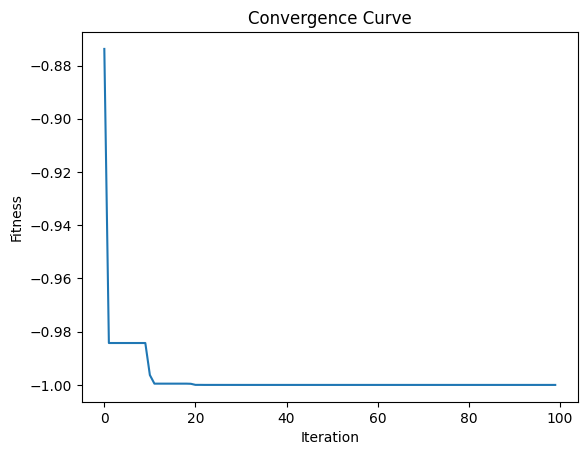

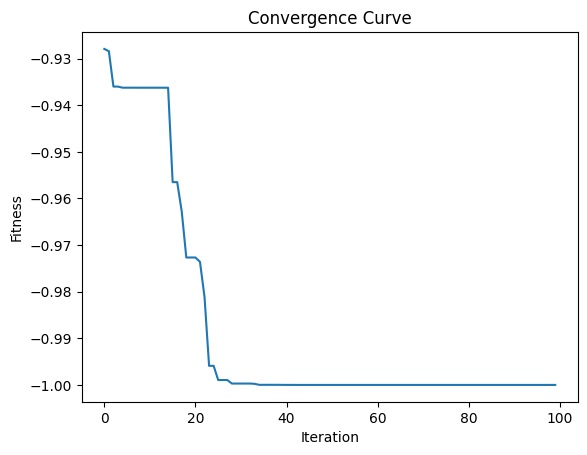

Random Initialization - Best position found: [8.77056915e-10 7.55114070e-11]
Random Initialization - Best score found: -1.0
Latin Hypercube Sampling Initialization - Best position found: [ 6.19850018e-10 -4.46024540e-10]
Latin Hypercube Sampling Initialization - Best score found: -1.0


In [2]:
# Define the bounds for each dimension
lower_bound = -5
upper_bound = 5

# Initialize PSO with Random Initialization
pso_random = PSO(drop, num_particles=30, max_iterations=100, dim=2, init_type='random', init_mean=0.0, init_std=1.0)
best_position_random, best_score_random = pso_random.pso_algorithm()

# Initialize PSO with Latin Hypercube Sampling Initialization
pso_lhs = PSO(drop, num_particles=30, max_iterations=100, dim=2, init_type='lhs', init_mean=0.0, init_std=1.0)
best_position_lhs, best_score_lhs = pso_lhs.pso_algorithm()

# Print results
print("Random Initialization - Best position found:", best_position_random)
print("Random Initialization - Best score found:", best_score_random)

print("Latin Hypercube Sampling Initialization - Best position found:", best_position_lhs)
print("Latin Hypercube Sampling Initialization - Best score found:", best_score_lhs)
